# 11장. 불확실성 구간 처리

## 추세 불확실성 모델링(Modeling uncertainty in trends)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
import numpy as np
np.random.seed(42)

df = pd.read_csv('/content/drive/MyDrive/Book7/data/baltimore_crime.csv')
df.columns = ['ds', 'y']

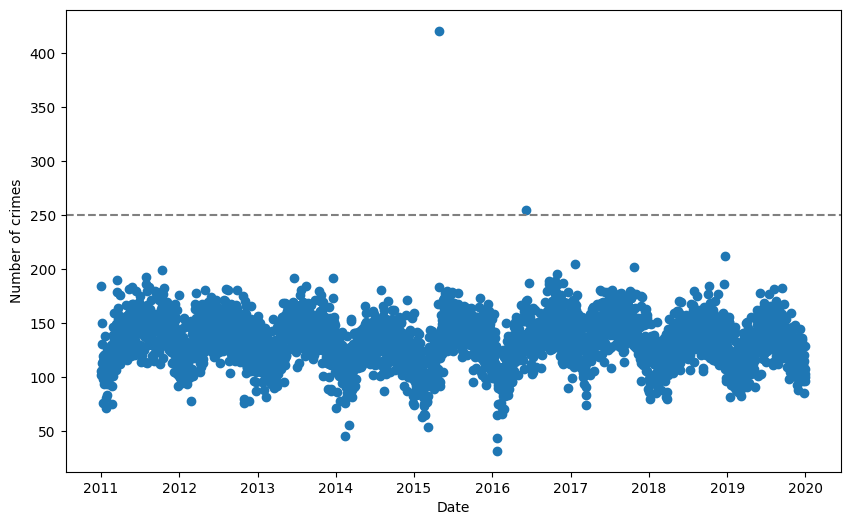

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(pd.to_datetime(df['ds']), df['y'])
plt.axhline(250, ls='--', c='gray')
plt.xlabel('Date')
plt.ylabel('Number of crimes')
plt.show()

In [ ]:
df.loc[df['y'] > 250, 'y'] = None

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp110ubqk4/cb5z3m0p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp110ubqk4/27s306wg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2219', 'data', 'file=/tmp/tmp110ubqk4/cb5z3m0p.json', 'init=/tmp/tmp110ubqk4/27s306wg.json', 'output', 'file=/tmp/tmp110ubqk4/prophet_modelp1m2gr7n/prophet_model-20250709142921.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:29:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:29:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


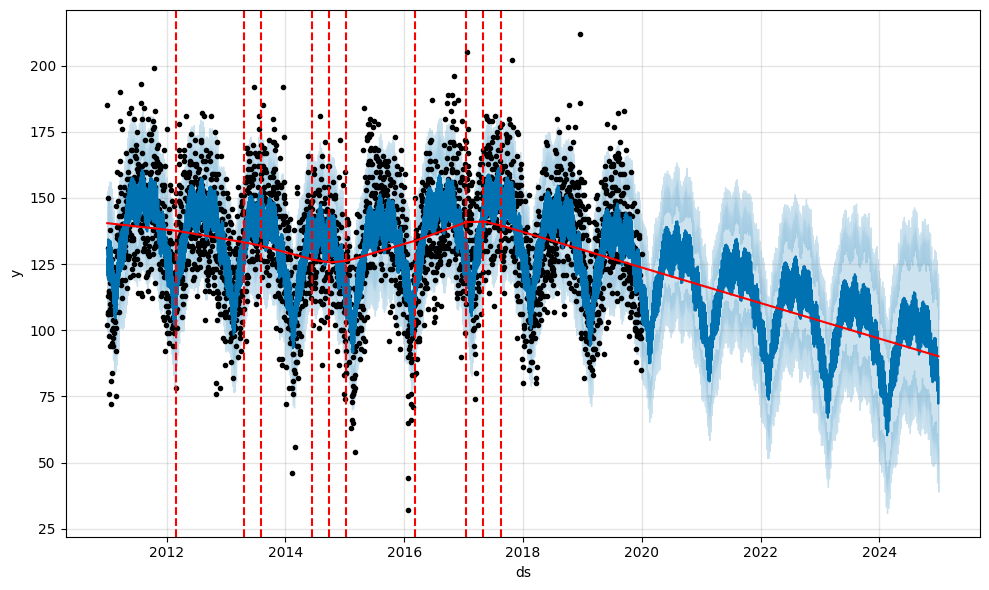

In [ ]:
model = Prophet(uncertainty_samples=1000)
model.fit(df)
future = model.make_future_dataframe(periods=365 * 5)
forecast = model.predict(future)
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

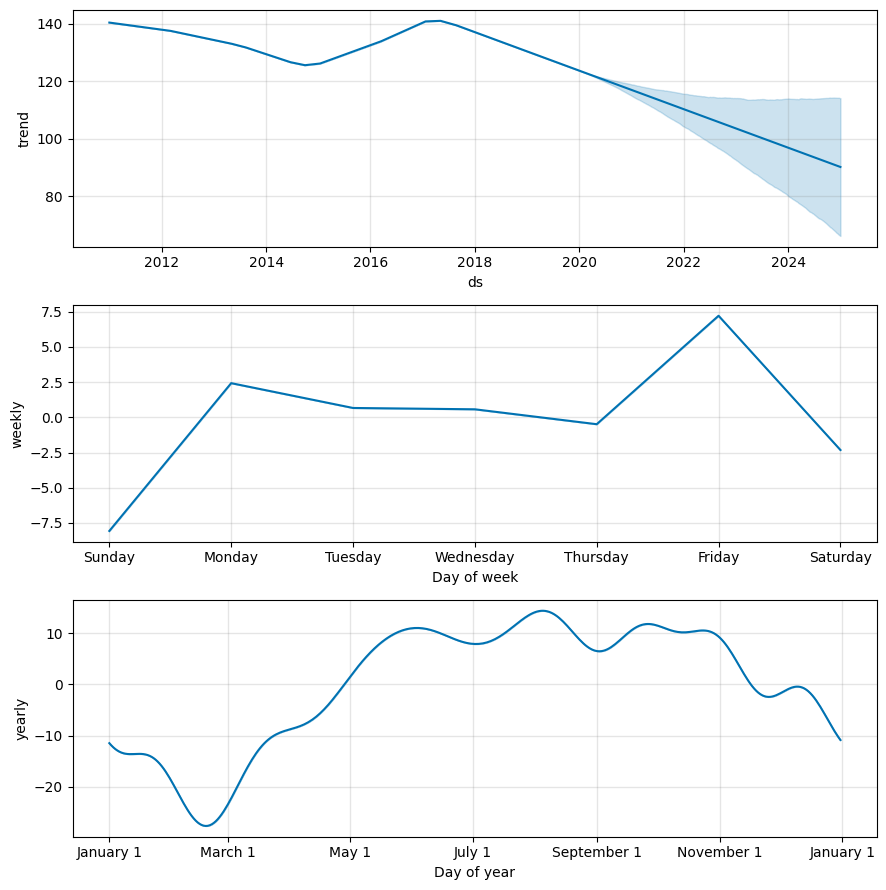

In [ ]:
fig2 = model.plot_components(forecast)
plt.show()

In [ ]:
# Saving for use later
m0 = model
f0 = forecast

In [ ]:
samples = model.predictive_samples(future)

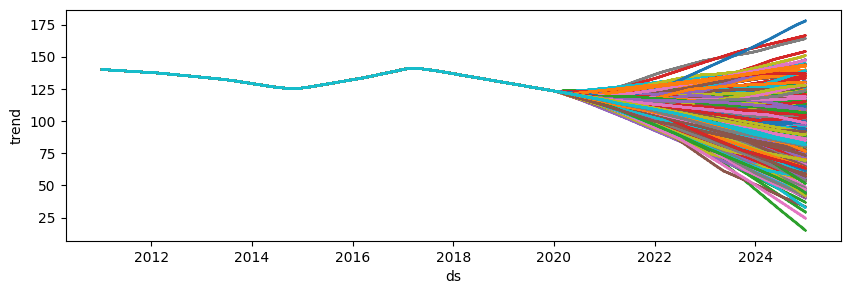

In [ ]:
samples = model.predictive_samples(future)

plt.figure(figsize=(10, 3))
for idx in range(model.uncertainty_samples):
    plt.scatter(future['ds'], samples['trend'][:, idx], s=.1, alpha=1)
plt.xlabel('ds')
plt.ylabel('trend')
plt.show()

In [ ]:
model = Prophet(interval_width=0.99)
model.fit(df)
future = model.make_future_dataframe(periods=365 * 5)
forecast = model.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp110ubqk4/4agfuk60.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp110ubqk4/dhxavszf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49151', 'data', 'file=/tmp/tmp110ubqk4/4agfuk60.json', 'init=/tmp/tmp110ubqk4/dhxavszf.json', 'output', 'file=/tmp/tmp110ubqk4/prophet_modelxekp0d1f/prophet_model-20250709143006.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:30:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:30:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


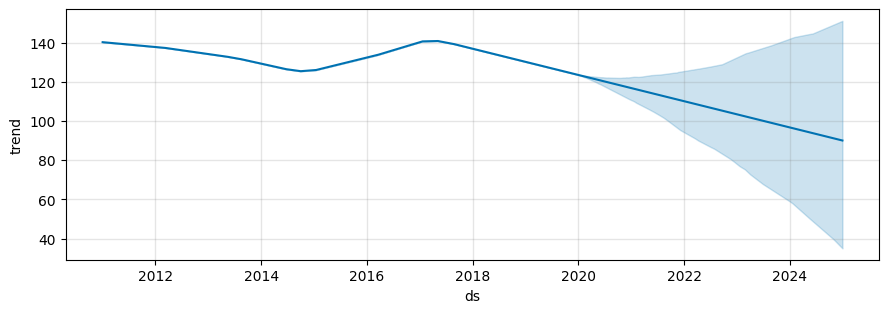

In [ ]:
from prophet.plot import plot_forecast_component

plot_forecast_component(model,
                        forecast,
                        'trend',
                        figsize=(10.5, 3.25))
plt.show()

## 계절성 불확실성 모델링(Modeling uncertainty in seasonality)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp110ubqk4/ihvftuzj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp110ubqk4/u3cw21ik.json
14:30:14 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=5944', 'data', 'file=/tmp/tmp110ubqk4/ihvftuzj.json', 'init=/tmp/tmp110ubqk4/u3cw21ik.json', 'output', 'file=/tmp/tmp110ubqk4/prophet_modelwimr_50_/prophet_model-20250709143014_1.csv', 'method=sample', 'num_samples=150', 'num_warmup=150', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=5944', 'data', 'file=/tmp/tmp110ubqk4/ihvftuzj.json', 'init=/tmp/tmp110ubqk4/u3cw21ik.json', 'output', 'file=/tmp/tmp110ubqk4/prophet_modelwimr_50_/prophet_model-20250709143014_2.csv', 'method=sample', 'num_samples=150', 'num_warmup=150', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdsta

14:35:25 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=5944', 'data', 'file=/tmp/tmp110ubqk4/ihvftuzj.json', 'init=/tmp/tmp110ubqk4/u3cw21ik.json', 'output', 'file=/tmp/tmp110ubqk4/prophet_modelwimr_50_/prophet_model-20250709143014_1.csv', 'method=sample', 'num_samples=150', 'num_warmup=150', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp110ubqk4/prophet_modelwimr_50_/prophet_model-20250709143014_1.csv
 console_msgs (if any):
	/tmp/tmp110ubqk4/prophet_modelwimr_50_/prophet_model-20250709143014_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 150
    num_warmup = 150
    save_warmup = 0 (Default)
    thin = 1 (Defaul

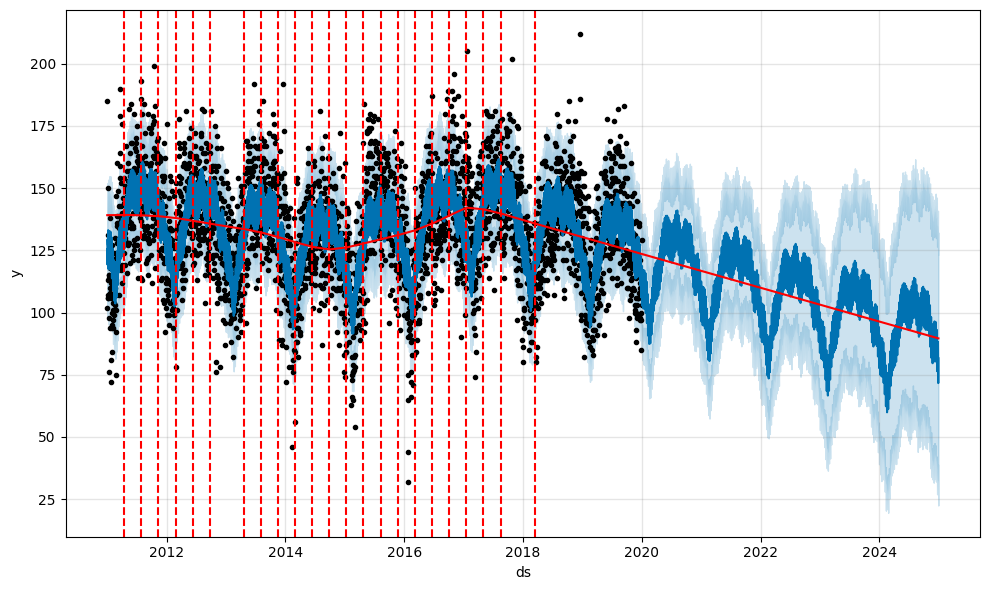

In [ ]:
# 런타임 6분
model = Prophet(mcmc_samples=300)
model.fit(df)
future = model.make_future_dataframe(periods=365 * 5)
forecast = model.predict(future)
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

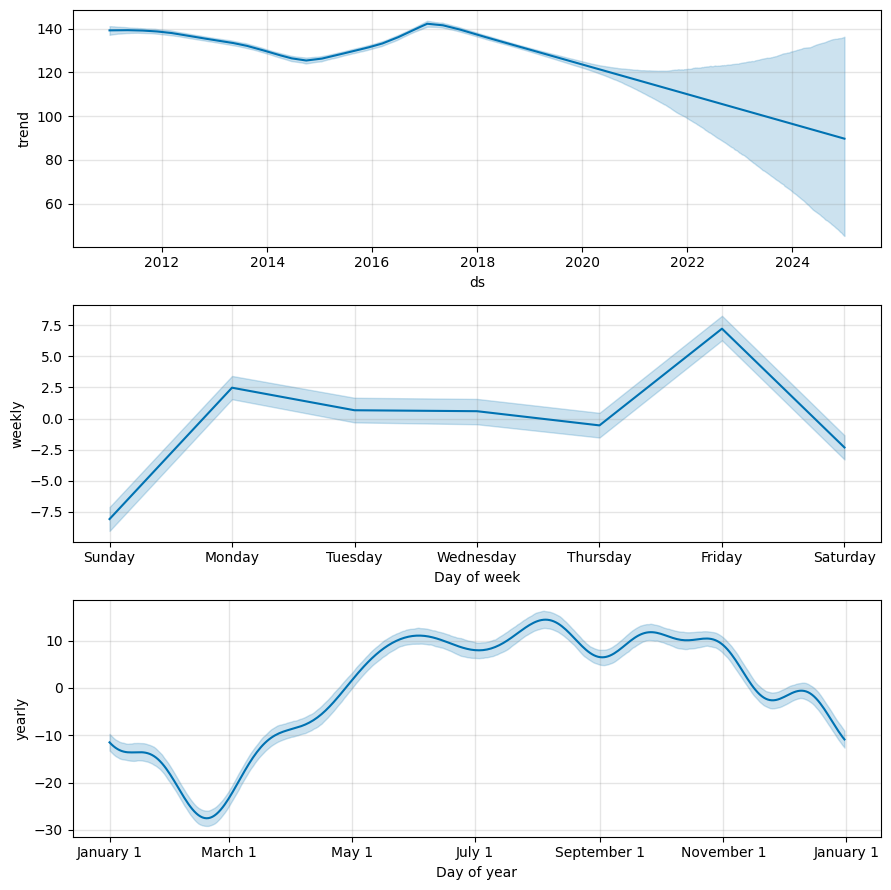

In [ ]:
fig2 = model.plot_components(forecast)
plt.show()

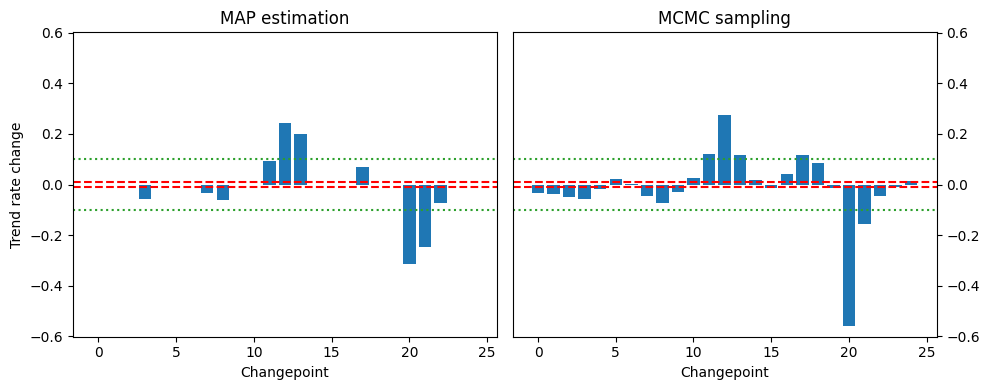

In [ ]:
fig = plt.figure(figsize=(10, 4))

ax1 = fig.add_subplot(121)
ax1.bar(np.arange(25), np.nanmean(m0.params['delta'], axis=0))
ax1.set_title('MAP estimation')
ax1.set_xlabel('Changepoint')
ax1.set_ylabel('Trend rate change')
ax1.axhline(y=0.01, color='r', ls='--')
ax1.axhline(y=-0.01, color='r', ls='--')
ax1.axhline(y=0.1, color='tab:green', ls=':')
ax1.axhline(y=-0.1, color='tab:green', ls=':')

ax2 = fig.add_subplot(122)
ax2.bar(np.arange(25), np.nanmean(model.params['delta'], axis=0))
ax2.set_xlabel('Changepoint')
ax2.axhline(y=0.01, color='r', ls='--')
ax2.axhline(y=-0.01, color='r', ls='--')
ax2.axhline(y=0.1, color='tab:green', ls=':')
ax2.axhline(y=-0.1, color='tab:green', ls=':')
ax2.set_title('MCMC sampling')
ax2.yaxis.tick_right()

ylim = max([abs(val) for val in ax1.get_ylim() + ax2.get_ylim()])
ax1.set_ylim(-ylim, ylim)
ax2.set_ylim(-ylim, ylim)

plt.tight_layout()
plt.show()

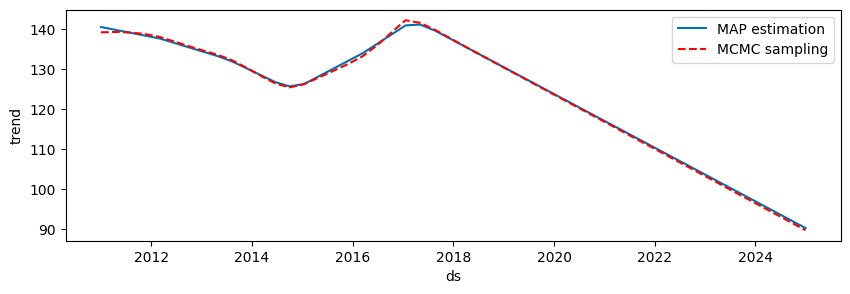

In [ ]:
plt.figure(figsize=(10, 3))

plt.plot(f0['ds'], f0['trend'], color='#0072B2', label='MAP estimation')

plt.plot(forecast['ds'], forecast['trend'], color='r', ls='--', label='MCMC sampling')

plt.ylabel('trend')
plt.xlabel('ds')
plt.legend()
plt.show()

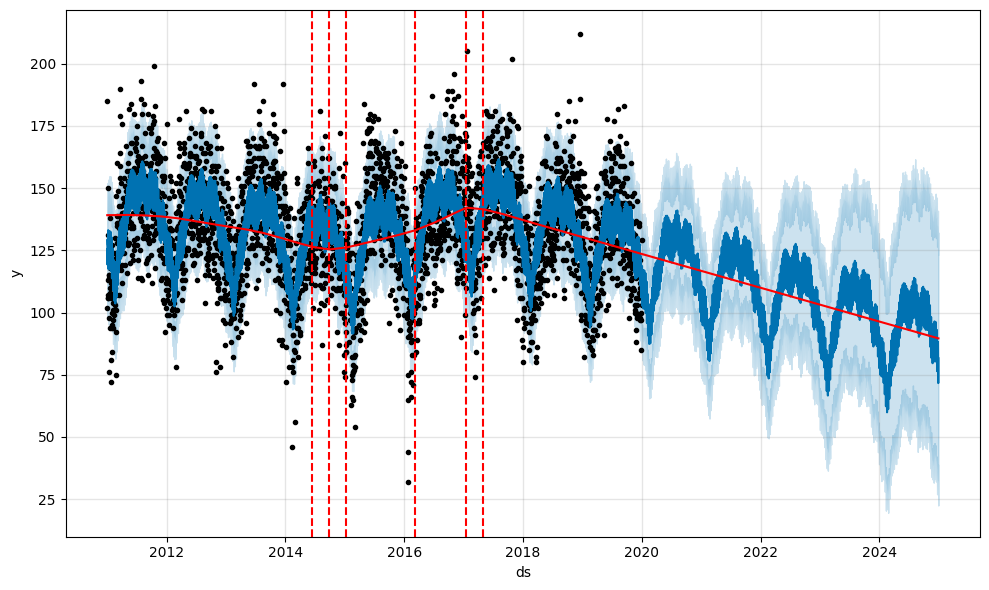

In [ ]:
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast, threshold=0.1)
plt.show()

In [ ]:
# Saving for use later
m1 = model
f1 = forecast

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp110ubqk4/k9k1_3kk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp110ubqk4/wjs6ate4.json
14:38:30 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=94769', 'data', 'file=/tmp/tmp110ubqk4/k9k1_3kk.json', 'init=/tmp/tmp110ubqk4/wjs6ate4.json', 'output', 'file=/tmp/tmp110ubqk4/prophet_modelmdmgakav/prophet_model-20250709143830_2.csv', 'method=sample', 'num_samples=150', 'num_warmup=150', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=94769', 'data', 'file=/tmp/tmp110ubqk4/k9k1_3kk.json', 'init=/tmp/tmp110ubqk4/wjs6ate4.json', 'output', 'file=/tmp/tmp110ubqk4/prophet_modelmdmgakav/prophet_model-20250709143830_1.csv', 'method=sample', 'num_samples=150', 'num_warmup=150', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmds

14:42:28 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=94769', 'data', 'file=/tmp/tmp110ubqk4/k9k1_3kk.json', 'init=/tmp/tmp110ubqk4/wjs6ate4.json', 'output', 'file=/tmp/tmp110ubqk4/prophet_modelmdmgakav/prophet_model-20250709143830_1.csv', 'method=sample', 'num_samples=150', 'num_warmup=150', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp110ubqk4/prophet_modelmdmgakav/prophet_model-20250709143830_1.csv
 console_msgs (if any):
	/tmp/tmp110ubqk4/prophet_modelmdmgakav/prophet_model-20250709143830_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 150
    num_warmup = 150
    save_warmup = 0 (Default)
    thin = 1 (Defau

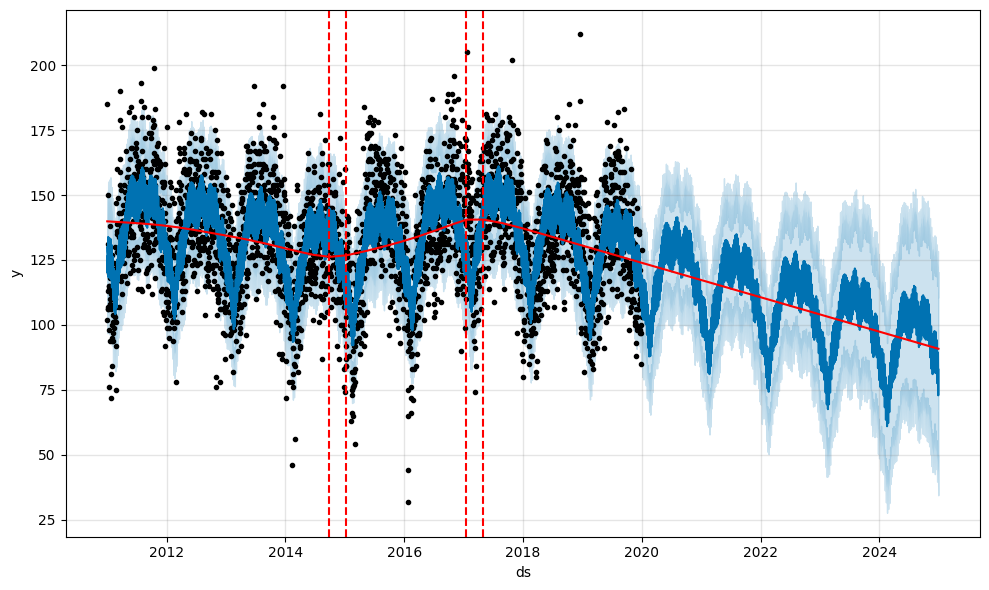

In [ ]:
# 런타임 4분
model = Prophet(changepoint_prior_scale=0.03,
                mcmc_samples=300)
model.fit(df)
future = model.make_future_dataframe(periods=365 * 5)
forecast = model.predict(future)
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast, threshold=0.1)
plt.show()

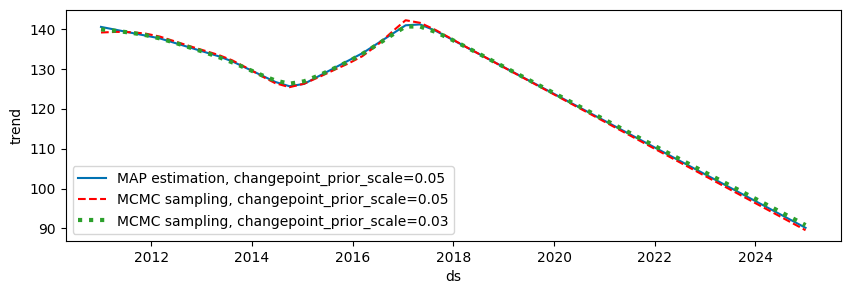

In [ ]:
plt.figure(figsize=(10, 3))

plt.plot(f0['ds'],
         f0['trend'],
         color='#0072B2',
         label='MAP estimation, changepoint_prior_scale=0.05')

plt.plot(f1['ds'],
         f1['trend'],
         color='r',
         ls='--',
         label='MCMC sampling, changepoint_prior_scale=0.05')

plt.plot(forecast['ds'],
         forecast['trend'],
         color='tab:green',
         ls=':',
         lw=3,
         label='MCMC sampling, changepoint_prior_scale=0.03')

plt.ylabel('trend')
plt.xlabel('ds')
plt.legend()
plt.show()